## 0. Import Libraries

In [2]:
from glob import glob
from metpy.units import units
from shapely.geometry import mapping
from matplotlib.patches import Patch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import geopandas as gpd
import seaborn as sns

import rioxarray
import cartopy
import matplotlib
import proplot

## 1. Parameters

In [2]:
# Change below
# ----------------------
# general path
name_var = 'cbh'
# ----------------------

path_general = 'data'
var_unit_dict = {
    'tp':'mm',
    't2m':'°C',
    'blh':'m',
    'cbh':'m'
}

var_name_dict = {
    'tp':'Total Precipitation',
    't2m':'2m Temperature',
    'blh':'Boundary Layer Height',
    'cbh':'Cloud Base Height'
}

## 2. Open Data

In [3]:
# open filtered dataframe
df = pd.read_excel(fr'{path_general}/{name_var}_filtered_dataframe_hourly.xlsx')

## 3. Visualize

In [4]:
cb_list = [
    '#9be3ff',
    '#009200',
    '#00b900',
    '#006900',
    '#009d86',
    '#70cdc0',
    '#c8bb27',
    '#929292',
    '#797100',
    '#b3b098',
    '#fcee81',
    '#f00',
]

labels = ['water', 'Evergreen Needleleaf Forest',
       'Deciduous Broadleaf Forest', 'Mixed Forest', 'Woodland',
       'Wooded Grassland', 'Closed Shrubland', 'Open Shrubland',
       'Grassland', 'Cropland', 'Bare Ground', 'Urban and Built-up']

cmap = matplotlib.colors.ListedColormap(cb_list)

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/cartesian.py:646: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_major_formatter(formatter)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  return func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword

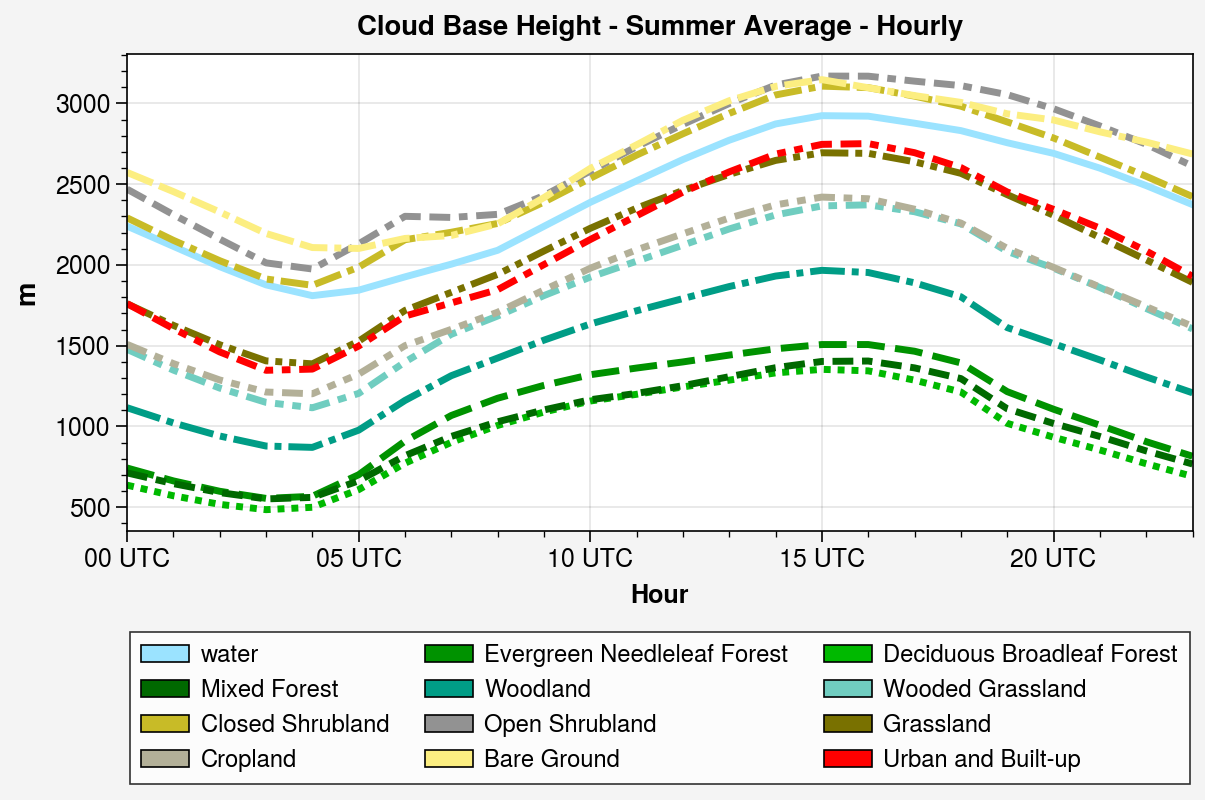

In [5]:
# fig features
fig_array = [[1, 1],
            ]
graphic_no = 1

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                            #aspect=1,
                            figsize=(6.025,4),
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=0.50,
                            wspace=0.4,
                            sharey=0)

sns.lineplot(data=df, palette=cb_list, linewidth=2.5, ax=axs, legend=False)

custom_lines = []
for i, cb_col in enumerate(cb_list):

    custom_lines.append(Patch(facecolor=cb_col,
                               edgecolor='k',
                               label=labels[i]))

leg = fig.legend(custom_lines, 
           labels=labels,
           ncols = 3,
           loc = 'bottom',
           prop={'size': 8.55})

axs.format(rowlabels=[fr'{var_unit_dict[name_var]}'],
           collabels=[fr'{var_name_dict[name_var]} - Summer Average - Hourly']
           )

axs.format(xticklabels=['00 UTC', '05 UTC', '10 UTC', '15 UTC', '20 UTC'],
           xlabel='Hour', xlabelweight='bold')

#save figure
plt.savefig(fr'pictures/{name_var}_summer_average_hourly.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=300)